# EMRI Example using FEW

To run this example you will have to have few installed.
This can done by installing this package with the dev option.

`pip install . [dev]`

In [1]:
import matplotlib.pyplot as plt

import numpy as np

from few.waveform import FastSchwarzschildEccentricFlux

In [6]:
use_gpu = False

# keyword arguments for inspiral generator (EMRIInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "buffer_length": int(1e3),  # all of the trajectories will be well under len = 1000
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "buffer_length": int(1e3),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "pad_output": False,
}


few = FastSchwarzschildEccentricFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs
)

In [7]:
# parameters
M = 1e6
mu = 1e2
p0 = 12.0
e0 = 0.4
theta = np.pi/3  # polar viewing angle
phi = np.pi/4  # azimuthal viewing angle
dt = 10.0  # seconds
T = 1.0  # years

wave = few(M, mu, p0, e0, theta, phi, dt=dt, T=T)  #  defaults to dt = 10.0 for max T = 1.0 year


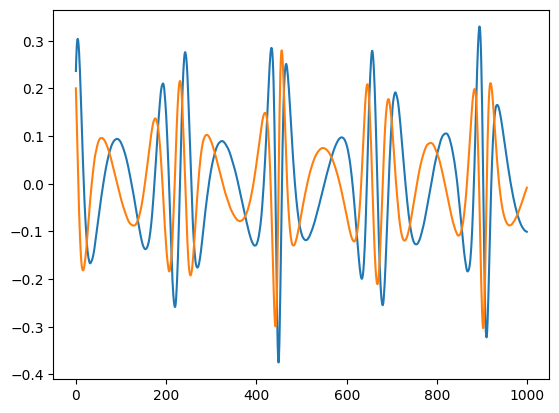

In [9]:
dt = 10.0
t = np.arange(len(wave)) * dt

plt.plot(wave.real[:1000])
plt.plot(wave.imag[:1000])
plt.show()